# Skaters (Season 2024/25) - Icetime

## Step 0: Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [23]:
from utils import df_utils, distributions_utils, pmf_utils, cdf_utils, modeling_distributions_utils, pdf_utils

## Step 1: Import the dataset

In [4]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [5]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [8]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [9]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153


Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: Variables

In [10]:
situation = "all"
feature = "icetime"
min_games_played = 20
name_player="Auston Matthews"

## Step 5: Summary statistics and Frequency Tables

**Icetime** feature is converted from seconds to minutes.

In [11]:
icetime_df = df.copy()
icetime_df[feature] = icetime_df[feature] / 60

answer = icetime_df[icetime_df["situation"]=="all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most icetime minutes: {answer["name"]} with {answer[feature]:.2f} minutes.")

Player with most icetime minutes: Zach Werenski with 2166.37 minutes.


To improve readability and avoid excessive granularity, icetime is converted now from seconds to whole hours. 

This reduces noise in the frequency table and highlights broader patterns in playing time among skaters who played at least 20 games.

Mean: 17.69
Variance: 54.28
Standard deviation: 7.36
Mode: 19.0


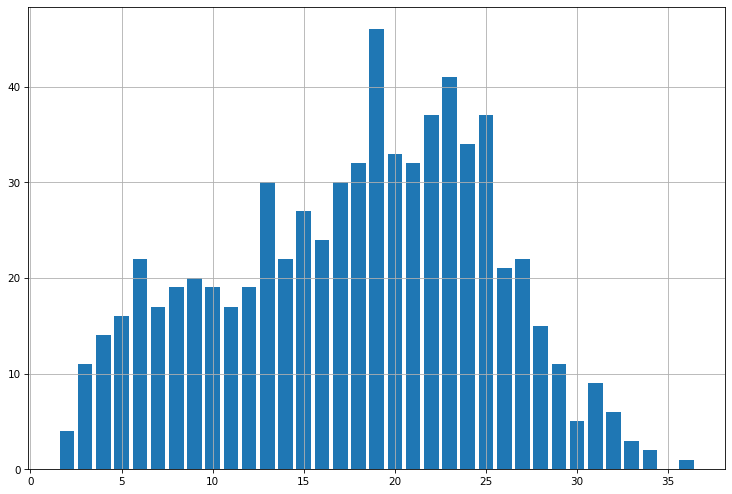

In [12]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Hours")

Cohen's effect size: -0.50


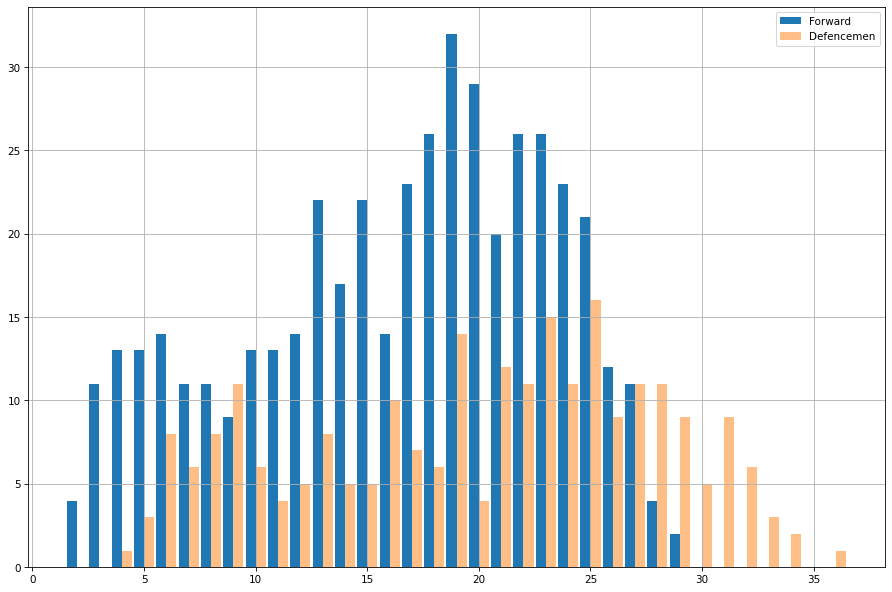

In [13]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

## Step 6: Probability Mass Function

Actual PMF: 
Mean: 17.69
Variance: 54.20
Standard deviation: 7.36
Mode: 19.0
Skewness: -0.21

Observed PMF: 
Mean: 20.75
Variance: 40.17
Standard deviation: 6.34
Mode: 23.0
Skewness: -0.42


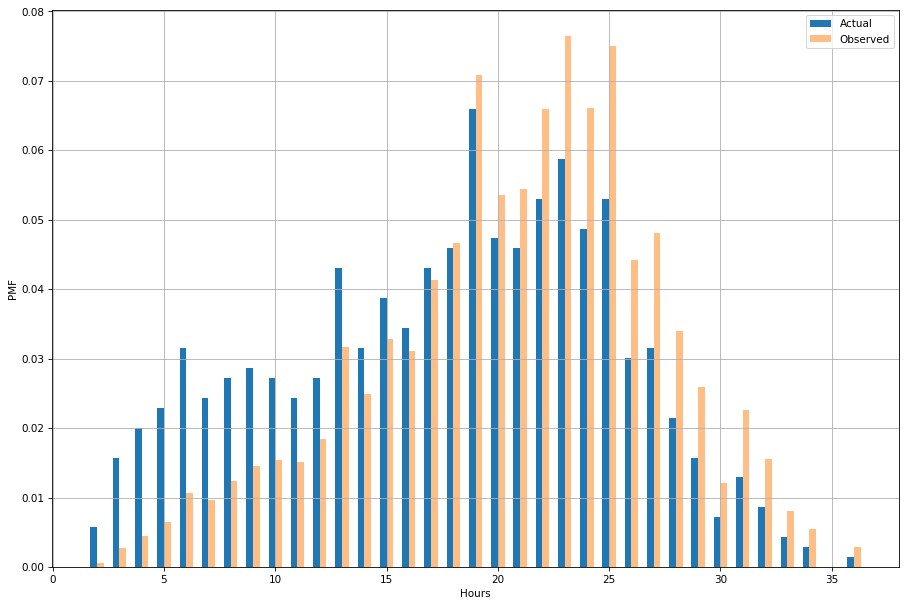

In [22]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
pmf_utils.plot_pmf(all_situations_df, feature, xlabel="Hours", width=0.3)

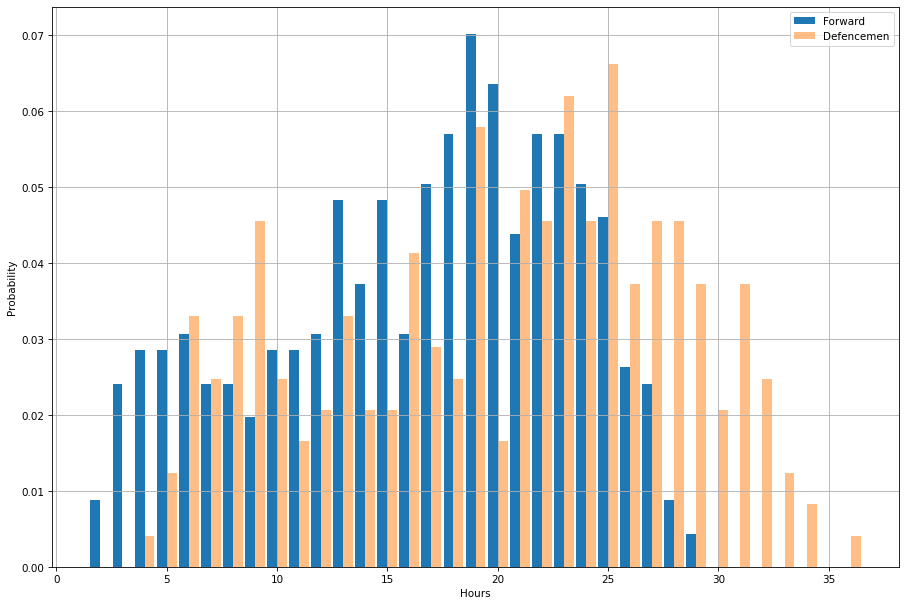

In [15]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

pmf_utils.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Hours")

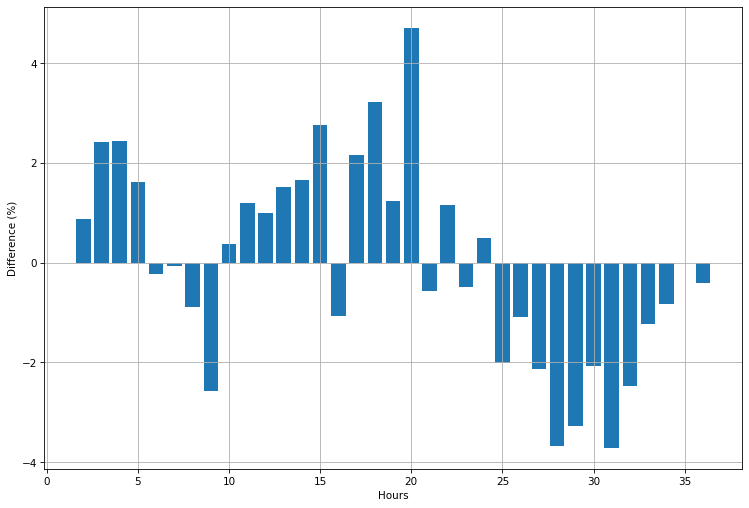

In [16]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
all_situations_df.loc[:, feature] = all_situations_df[feature] // 3600
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

pmf_utils.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Hours")

## Step 7: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

Auston Matthews - Percentile rank: 69.63
Median: 69042.00
Interquartile range: 39292.00
Quartile skewness: -0.16


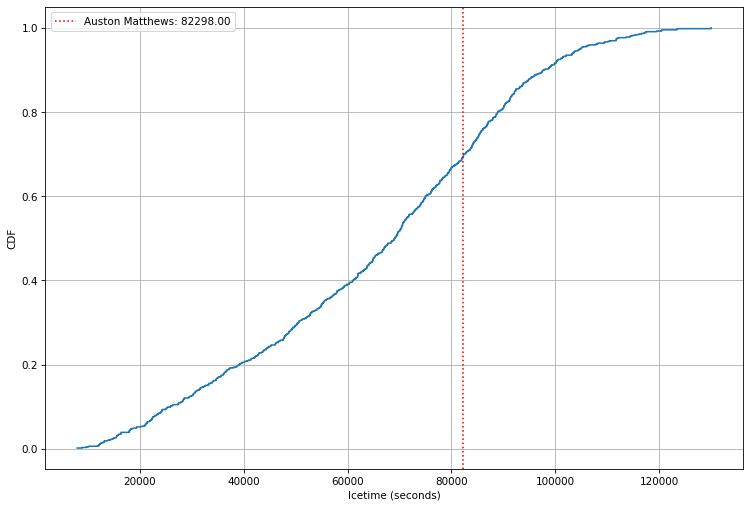

In [17]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Icetime (seconds)")

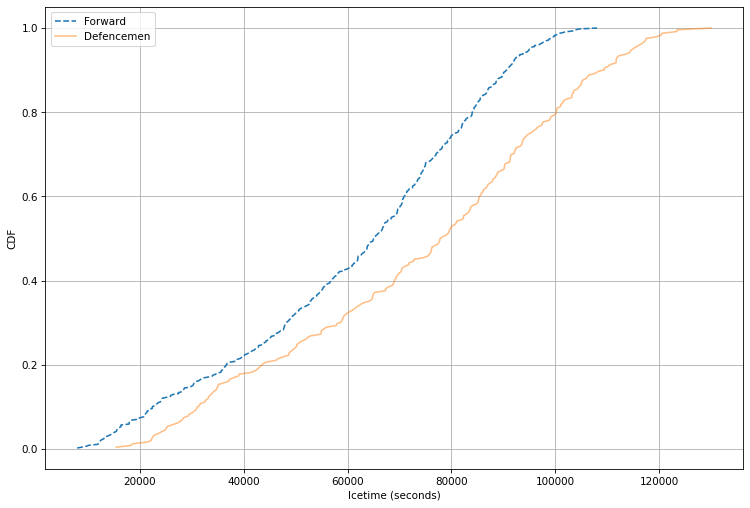

In [18]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Icetime (seconds)")

## Step 8: Modeling Distributions

## Step 9: Probability Density Function and Kernel Density Estimate

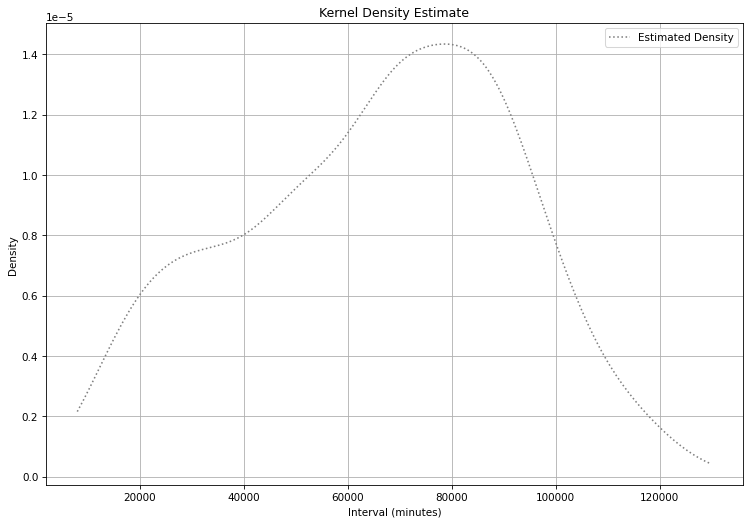

In [24]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
pdf_utils.plot_kde(all_situations_df, feature)

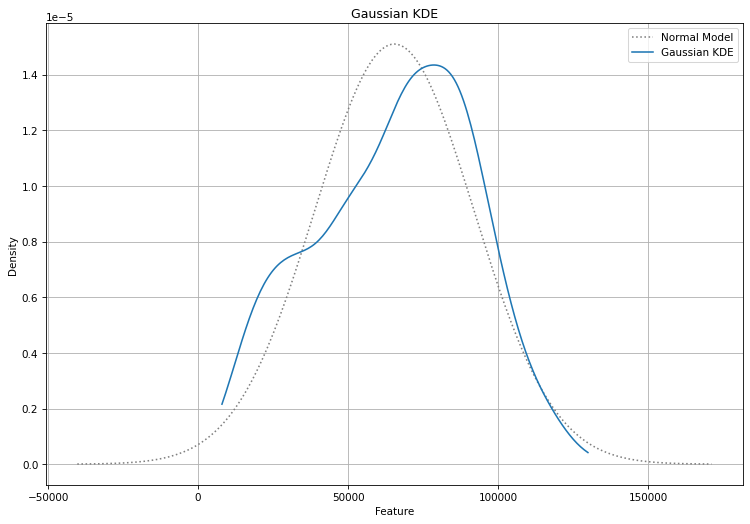

In [ ]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
pdf_utils.plot_gaussian_kde(all_situations_df[feature])